In [63]:
import os
import sys
import pathlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sys.path.append('../python')

from mpl_settings_v3 import *

from auxiliary import read_data_file, load_delta_data, read_data_file, getLinearReg
from plot_auxiliary import *

from scipy.integrate import simps
from scipy.interpolate import interp1d


In [4]:
btw_values = {}

In [69]:
net_type = 'DT'
size = 2048
param = 'param'
attacks = ['BtwU']
seeds = range(50, 100)
nsamples = 5
overwrite = False

dir_name = os.path.join('..', 'networks', net_type)
if net_type == 'MR':
    if 'meank' in sys.argv:
        base_net_name, base_net_name_size = get_base_network_name(net_type, size, param, meank=True)
    elif 'rMST' in sys.argv:
        base_net_name, base_net_name_size = get_base_network_name(net_type, size, param, rMST=True)
    else:
        base_net_name, base_net_name_size = get_base_network_name(net_type, size, param)
else:    
    base_net_name, base_net_name_size = get_base_network_name(net_type, size, param)
base_net_dir = os.path.join(dir_name, base_net_name, base_net_name_size)


for attack in attacks:
    print(attack)
    if overwrite:
        btw_values = {}
    for seed in seeds:
        net_name = base_net_name_size + '_{:05d}'.format(seed)
        net_dir = os.path.join(base_net_dir, net_name)
        attack_dir = os.path.join(net_dir, attack)
        
        #g = read_data_file(net_dir, net_name, reader='igraph')
        oi_values = read_data_file(attack_dir, 'oi_list', reader='numpyInt')
        
        try:
            g, max_pos, delta_max = load_delta_data(net_type, size, param, attack, seed)
        except FileNotFoundError:
            print('Inexisting file:', seed)
            continue
            
        
        sample_positions = np.linspace(0, max_pos, nsamples).astype('int')
        
        for i, sample_pos in enumerate(sample_positions):
            print(seed, i)
            h = g.copy()
            h.delete_vertices(oi_values[:sample_pos])
            
            btw_values_it = h.betweenness(directed=False, nobigint=False)
            if sample_pos not in btw_values:   
                btw_values[sample_pos] = btw_values_it
            else:
                btw_values[sample_pos] += btw_values_it

BtwU
50 0
50 1
50 2
50 3
50 4
51 0
51 1
51 2
51 3
51 4
52 0
52 1
52 2
52 3
52 4
53 0
53 1
53 2
53 3
53 4
54 0
54 1
54 2
54 3
54 4
55 0
55 1
55 2
55 3
55 4
56 0
56 1
56 2
56 3
56 4
57 0
57 1
57 2
57 3
57 4
58 0
58 1
58 2
58 3
58 4
59 0
59 1
59 2
59 3
59 4
60 0
60 1
60 2
60 3
60 4
61 0
61 1
61 2
61 3
61 4
62 0
62 1
62 2
62 3
62 4
63 0
63 1
63 2
63 3
63 4
64 0
64 1
64 2
64 3
64 4
65 0
65 1
65 2
65 3
65 4
66 0
66 1
66 2
66 3
66 4
67 0
67 1
67 2
67 3
67 4
68 0
68 1
68 2
68 3
68 4
69 0
69 1
69 2
69 3
69 4
70 0
70 1
70 2
70 3
70 4
71 0
71 1
71 2
71 3
71 4
72 0
72 1
72 2
72 3
72 4
73 0
73 1
73 2
73 3
73 4
74 0
74 1
74 2
74 3
74 4
75 0
75 1
75 2
75 3
75 4
76 0
76 1
76 2
76 3
76 4
77 0
77 1
77 2
77 3
77 4
78 0
78 1
78 2
78 3
78 4
79 0
79 1
79 2
79 3
79 4
80 0
80 1
80 2
80 3
80 4
81 0
81 1
81 2
81 3
81 4
82 0
82 1
82 2
82 3
82 4
83 0
83 1
83 2
83 3
83 4
84 0
84 1
84 2
84 3
84 4
85 0
85 1
85 2
85 3
85 4
86 0
86 1
86 2
86 3
86 4
87 0
87 1
87 2
87 3
87 4
88 0
88 1
88 2
88 3
88 4
89 0
89 1
89 2
89 3


In [66]:
histograms = {}
for sample_pos in sample_positions:
    btw_values_sample = np.array(btw_values[sample_pos])
    btw_values_sample = btw_values_sample[btw_values_sample>0]
    bins = np.logspace(0, np.log10(btw_values_sample.max()+1), 30)
    freq, bin_edges = np.histogram(btw_values_sample, bins=bins, density=True)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    
    histograms[sample_pos] = (freq, bin_centers)

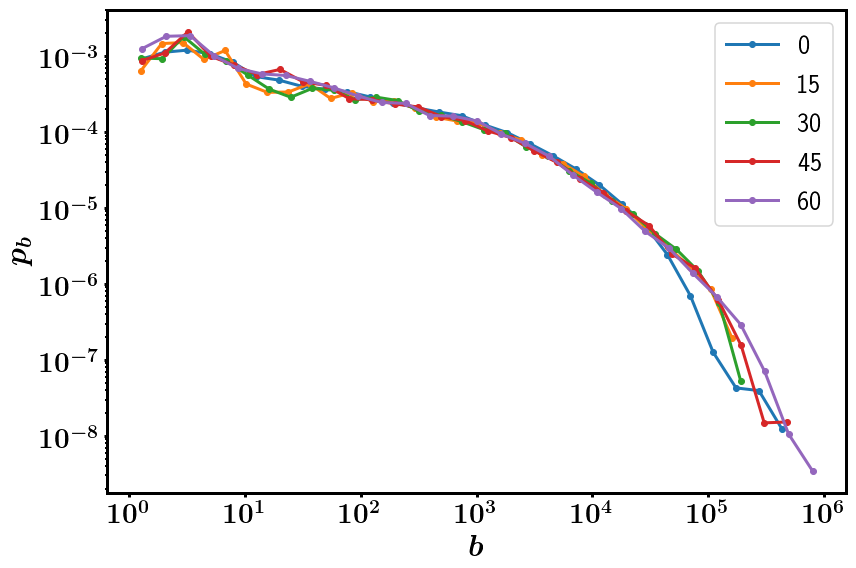

In [67]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(12*ncols,8*nrows), ncols=ncols, nrows=nrows)

#ax = axes[0]
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$b$')
ax.set_ylabel(r'$p_b$')
for sample_pos in sample_positions:
    freq, bin_edges = histograms[sample_pos]
    mask = freq>0
    X, Y = bin_edges[mask], freq[mask]
    ax.plot(X, Y, 'o-', label=sample_pos)
ax.legend()

plt.tight_layout()
plt.show()

In [1]:
def get_attack_data(net_type, size, param, seed, attack):
    dir_name = pathlib.Path(f'../networks/{net_type}')  
    base_net_name, base_net_name_size = get_base_network_name(net_type, size, param)
    base_net_dir = dir_name / base_net_name / base_net_name_size    
    net_name = base_net_name_size + '_{:05d}'.format(seed)
    net_dir = base_net_dir / net_name / attack

    centrality_data = np.loadtxt(net_dir / 'initial_centrality.txt', delimiter=',')

    base_attack = attack.split('_')[0] if '_' in attack else attack
    
    if base_attack == 'Btw':
        centrality = np.sort(centrality_data)[::-1]
        #centrality_sec = -np.diff(centrality)
        centrality_sec = np.append(centrality[1:], [np.NaN])
        
    if base_attack == 'BtwU':
        centrality = centrality_data[:,0]
        centrality_sec = centrality_data[:,2]
    
    order = read_data_file(net_dir, 'oi_list', reader='numpyInt')
    return order, centrality, centrality_sec

In [10]:
net_type = 'DT'
size = 4096
#size = 16384
#size = 65536
param = 'param'
#l_values = list(range(2, 9)) + [16, 24, 32, 48, 58, 59, 60, 61, 62, 63, 64, 66, 68, 96, 128]
#l_values = [2, 3, 4, 8, 16, 32, 64]
#l_values = [2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64]
#l_values = [2, 3, 4, 8, 16, 32, 64]
l_values = list(range(2, 36))
seeds = range(1)
nseeds = len(seeds)
base_attack = 'Btw'

attack_dfs = {}
attack_dfs[base_attack] = load_dataframe(net_type, size, param, base_attack)

centrality_sec_dict = {}
centrality_dict = {}
order_dict = {}
for seed in seeds:
    order, centrality, centrality_sec = get_attack_data(net_type, size, param, seed, base_attack)
    centrality_sec_dict[seed] = {base_attack: centrality_sec}
    centrality_dict[seed] = {base_attack: centrality}
    order_dict[seed] = {base_attack: order}

for l in list(l_values):
    attack = f'{base_attack}_cutoff{l}'
    for seed in seeds:
        try:
            order, centrality, centrality_sec = get_attack_data(net_type, size, param, seed, attack)
            centrality_sec_dict[seed][l] = centrality_sec
            centrality_dict[seed][l] = centrality
            order_dict[seed][l] = order
        except (FileNotFoundError, OSError) as e:
            l_values.remove(l)
            print(e)

c2_dfs = {}
c_dfs = {}
o_dfs = {}
for seed in seeds:
    c2_df = pd.DataFrame(centrality_sec_dict[seed])
    c_df = pd.DataFrame(centrality_dict[seed])
    o_df = pd.DataFrame(order_dict[seed])
    
    c2_dfs[seed] = c2_df
    c_dfs[seed] = c_df
    o_dfs[seed] = o_df
    

rc_values, rc_values_std = get_rc_values([size], l_values=l_values, min_nseeds=100, base_attack=base_attack)

../networks/DT/DT_param/DT_param_N4096/DT_param_N4096_00000/Btw_cutoff11/initial_centrality.txt not found.
../networks/DT/DT_param/DT_param_N4096/DT_param_N4096_00000/Btw_cutoff12/initial_centrality.txt not found.
../networks/DT/DT_param/DT_param_N4096/DT_param_N4096_00000/Btw_cutoff13/initial_centrality.txt not found.
../networks/DT/DT_param/DT_param_N4096/DT_param_N4096_00000/Btw_cutoff14/initial_centrality.txt not found.
../networks/DT/DT_param/DT_param_N4096/DT_param_N4096_00000/Btw_cutoff15/initial_centrality.txt not found.
../networks/DT/DT_param/DT_param_N4096/DT_param_N4096_00000/Btw_cutoff17/initial_centrality.txt not found.
../networks/DT/DT_param/DT_param_N4096/DT_param_N4096_00000/Btw_cutoff18/initial_centrality.txt not found.
../networks/DT/DT_param/DT_param_N4096/DT_param_N4096_00000/Btw_cutoff19/initial_centrality.txt not found.
../networks/DT/DT_param/DT_param_N4096/DT_param_N4096_00000/Btw_cutoff20/initial_centrality.txt not found.
../networks/DT/DT_param/DT_param_N409

In [11]:
o_df.head()

,Btw,2,3,4,5,6,7,8,9,10,16,32
0,816,816,816,3824,3824,3824,816,816,816,816,816,816
1,3824,2327,3824,816,816,816,3824,3824,3824,3824,3824,3824
2,1027,3033,3033,3033,3033,3033,1027,1027,1027,1027,1027,1027
3,2919,198,2327,1027,1027,1027,3033,3033,3033,3033,1418,2919
4,1418,1300,1027,2755,2755,2755,2755,1418,1418,1418,3033,1418


In [7]:
c_df

,Btw,2,3,4,8,16,32,64
0,2.024881e+06,60.333333,424.345238,1617.111147,25731.186596,391397.287099,2.011545e+06,2.024881e+06
1,1.864763e+06,58.333333,377.733333,1499.814141,24177.254018,359379.535788,1.851688e+06,1.864763e+06
2,1.551895e+06,49.750000,364.302381,1372.248124,22345.782344,305961.646543,1.544946e+06,1.551895e+06
3,1.439697e+06,47.833333,348.233333,1287.812049,20792.630563,247390.894049,1.428752e+06,1.439697e+06
4,1.349791e+06,47.666667,331.883333,1181.666256,17720.337915,246423.599727,1.342696e+06,1.349791e+06
...,...,...,...,...,...,...,...,...
4091,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
4092,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
4093,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
4094,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00


In [67]:
c2_df

,BtwU,2,3,4,8,16,32,64
0,1.864763e+06,58.333333,377.733333,1499.814141,24177.254018,359379.535788,1.851688e+06,1.864763e+06
1,1.547563e+06,49.750000,364.302381,1372.248124,20792.630563,221291.508777,1.493040e+06,1.547563e+06
2,1.445885e+06,47.833333,340.066667,1090.845094,17712.004582,185532.278488,1.308907e+06,1.445885e+06
3,1.340233e+06,47.666667,246.600000,948.108009,15901.416615,129682.811704,1.137969e+06,1.340233e+06
4,1.090858e+06,40.500000,238.376190,904.423352,13451.117167,128036.036043,8.936628e+05,1.090858e+06
...,...,...,...,...,...,...,...,...
4091,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
4092,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
4093,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
4094,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00


In [68]:
attack_dfs[base_attack].head()

,f,Sgcc,varSgcc,Nsec,meanS,chiDelta
0,0.000000,1.000000,0.0,0.0,1.0,-1.0
1,0.000244,0.999756,0.0,0.0,1.0,-1.0
2,0.000488,0.999512,0.0,0.0,1.0,-1.0
3,0.000732,0.999268,0.0,0.0,1.0,-1.0
4,0.000977,0.999023,0.0,0.0,1.0,-1.0


In [69]:
rc = rc_values[size][0]
std_rc = rc_values_std[size][0]
vline = int(rc*size)
vline_m_std = int((rc-std_rc)*size)
vline_p_std = int((rc+std_rc)*size)

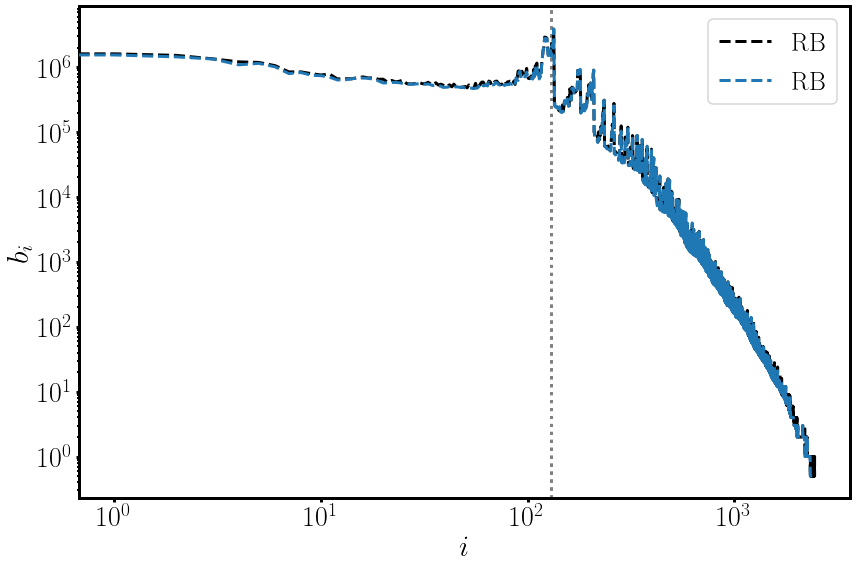

In [70]:
c_df = c_dfs[0]

ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(12*ncols,8*nrows), ncols=ncols, nrows=nrows)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$i$')
ax.set_ylabel(r'$b_i$')
Y = c_df[base_attack].reset_index(drop=True).replace({0: np.NaN})
Y2 = c2_df[base_attack].reset_index(drop=True).replace({0: np.NaN})

#ax.set_xlim(100, 200)
#ax.set_ylim(1e5, 1e7)
ax.plot(
    Y,
    '--k', zorder=100, label=attack_dict[base_attack]
)

ax.plot(
    Y2,
    '--', zorder=100, label=attack_dict[base_attack]
)

#ax.plot(
    #Y,
#    Y/attack_dfs[base_attack].Sgcc,
#    '--', zorder=100, label=attack_dict[base_attack]
#)
lstar = 64
for l in l_values:
    #if l >= lstar:
    #    break
    Y = c_df[l].reset_index(drop=True)
    Y2 = c2_df[l].reset_index(drop=True)
    #Y = diff_df[col].reset_index(drop=True)
    #ax.plot(
    #    Y, 'o', #label=attack_dict[col]
    #)
    #ax.plot(
    #    Y2, 'o', #label=attack_dict[col]
    #)

ax.axvline(vline, linestyle=':', color='gray')
ax.axvline(vline_m_std, linestyle=':', color='gray')
ax.axvline(vline_p_std, linestyle=':', color='gray')

ax.legend()

plt.tight_layout()
plt.savefig(f'../draft/figs/bi_vs_i_{base_attack}.png', transparent=False)
plt.show()

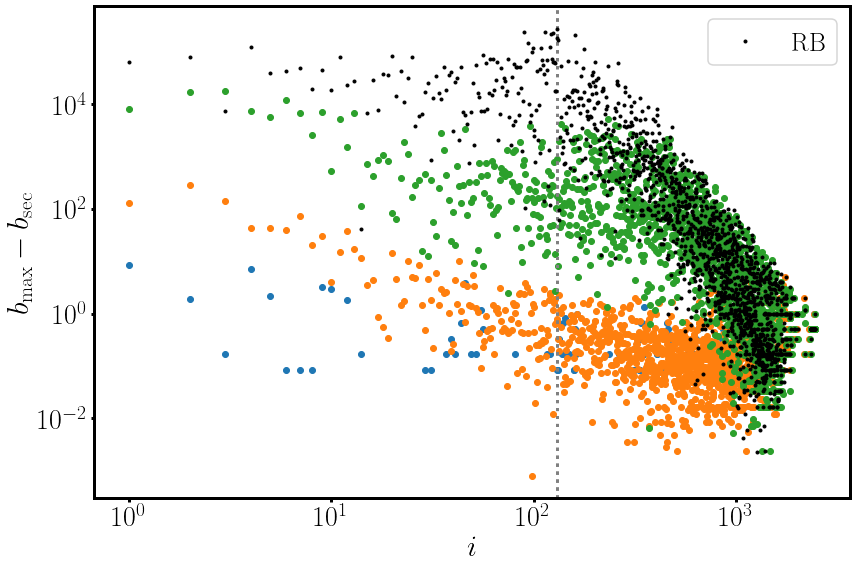

In [71]:
c_df = c_dfs[0]
c2_df = c2_dfs[0]
relative = False

def get_diff(col):
    diff = (c_df[col]-c2_df[col])
    if relative:
        diff = diff / c_df[col]
    return diff.round(5)

ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(12*ncols,8*nrows), ncols=ncols, nrows=nrows)

#ax.set_xlim(0, 4*vline)
#ax.set_ylim(1e-3, 2*get_diff(base_attack).max())
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$i$')
ax.set_ylabel(r'$b_{\mathrm{max}}-b_{\mathrm{sec}}$')
Y = get_diff(base_attack).reset_index(drop=True).replace({0: np.NaN})
ax.plot(
    Y, '.', color='k', zorder=100, label=attack_dict[base_attack]
)
lstar = 64
_l_values = [2, 4, 16]
for l in _l_values:
    #if l >= lstar:
    #    break
    Y = get_diff(l).reset_index(drop=True).replace({0: np.NaN})
    #Y = diff_df[col].reset_index(drop=True)
    ax.plot(
        Y, 'o', #label=attack_dict[col]
    )
    
ax.axvline(vline, linestyle=':', color='gray')
ax.axvline(vline_m_std, linestyle=':', color='gray')
ax.axvline(vline_p_std, linestyle=':', color='gray')

ax.legend()

plt.tight_layout()
plt.savefig(f'../draft/figs/diff_c1_c2_{base_attack}.png', transparent=False)
plt.show()

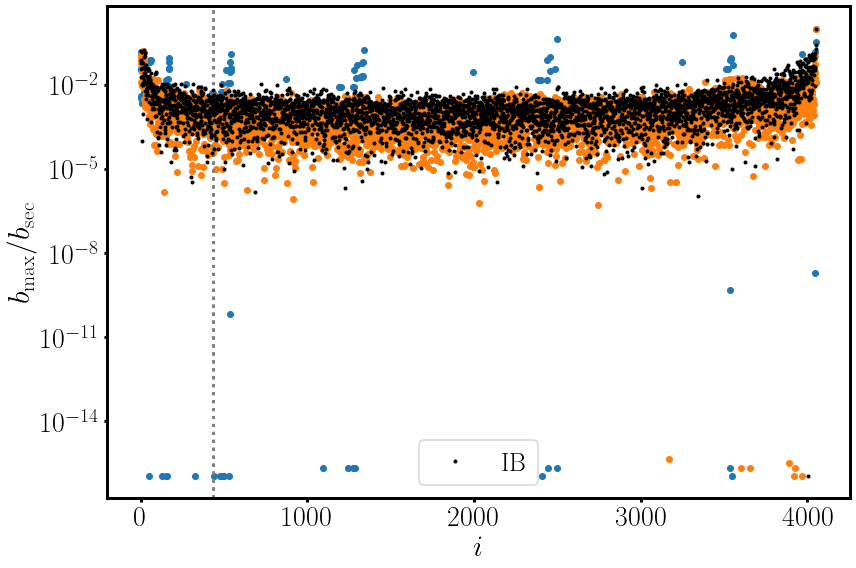

In [59]:
c_df = c_dfs[0]
c2_df = c2_dfs[0]
relative = False

def get_quotient(col):
    quotient = (c2_df[col]/c_df[col])
    return 1-quotient#.round(5)

ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(12*ncols,8*nrows), ncols=ncols, nrows=nrows)

#ax.set_xlim(0, 4*vline)
#ax.set_ylim(1e-3, 2*get_diff(base_attack).max())
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$i$')
ax.set_ylabel(r'$b_{\mathrm{max}}/b_{\mathrm{sec}}$')
Y = get_quotient(base_attack).reset_index(drop=True).replace({0: np.NaN})
ax.plot(
    Y, '.', color='k', zorder=100, label=attack_dict[base_attack]
)
lstar = 64
_l_values = [2, 4]
for l in _l_values:
    #if l >= lstar:
    #    break
    Y = get_quotient(l).reset_index(drop=True).replace({0: np.NaN})
    #Y = diff_df[col].reset_index(drop=True)
    ax.plot(
        Y, 'o', #label=attack_dict[col]
    )
    
ax.axvline(vline, linestyle=':', color='gray')
ax.axvline(vline_m_std, linestyle=':', color='gray')
ax.axvline(vline_p_std, linestyle=':', color='gray')

ax.legend()

plt.tight_layout()
plt.savefig(f'../draft/figs/diff_c1_c2_{base_attack}.png', transparent=False)
plt.show()

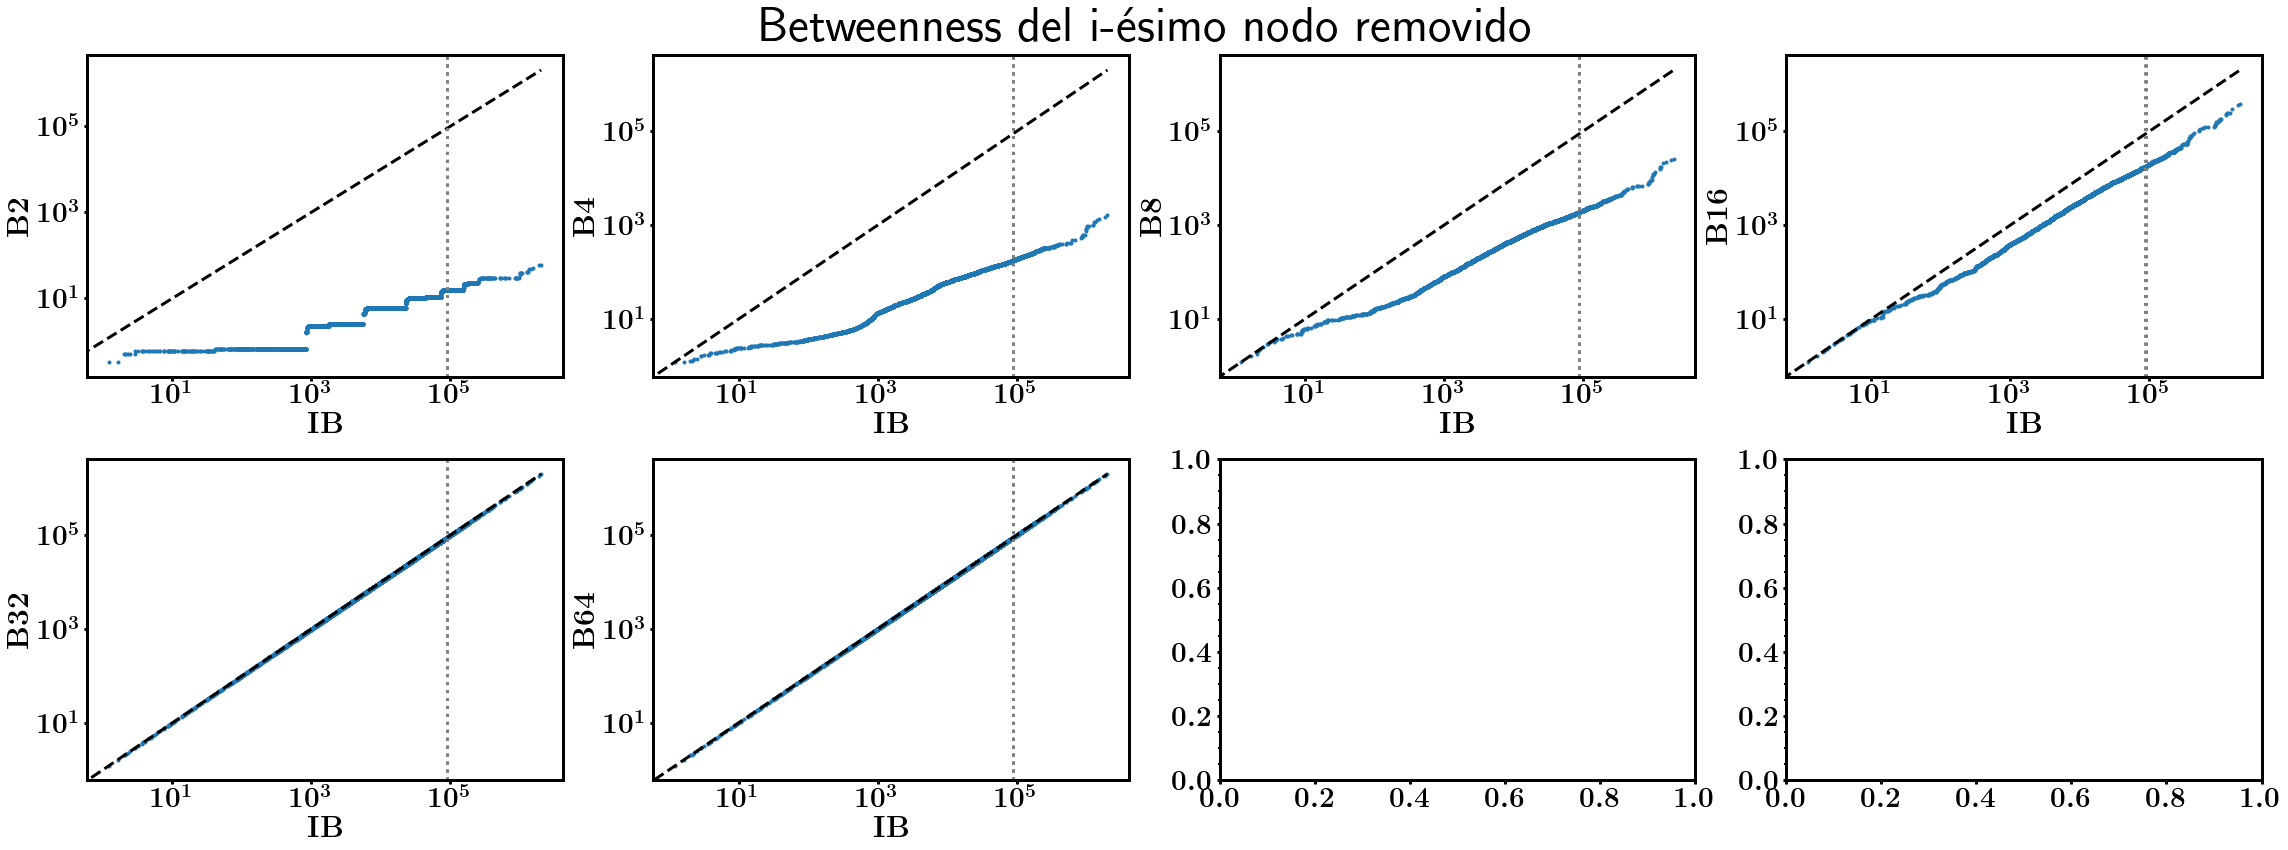

In [538]:
rc = rc_values[size][0]
std_rc = rc_values_std[size][0]
rc_idx = int(rc*c_df.shape[0])
vline = c_df[base_attack].values[rc_idx]
vline_m_std = c_df[base_attack].values[int((rc-std_rc)*c_df.shape[0])]
vline_p_std = c_df[base_attack].values[int((rc+std_rc)*c_df.shape[0])]
identity = [c_df.min().min(), c_df.max().max()]

ncols = 4
nrows = 2
fig, axes = plt.subplots(figsize=(8*ncols,6*nrows), ncols=ncols, nrows=nrows)
fig.suptitle('Betweenness del i-ésimo nodo removido', fontsize=50)
axes = axes.flatten()

_l_values = sorted(set([2, 4, 8, 16, 32, 48, 58, 64]).intersection(l_values))
for i, l in enumerate(_l_values):
    ax = axes[i]
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(attack_dict[base_attack])
    ax.set_ylabel(attack_dict[f'{base_attack}_cutoff{l}'])
    ax.plot(c_df[base_attack], c_df[l], '.')
    #ax.plot(c_df['Btw'], c_df['Btw']-c_df[f'Btw_cutoff{l}'], '.')
    ax.plot(identity, identity, '--k')
    ax.axvline(vline, linestyle=':', color='gray')
    ax.axvline(vline_m_std, linestyle=':', color='gray')
    ax.axvline(vline_p_std, linestyle=':', color='gray')

plt.tight_layout()

plt.savefig(f'../draft/figs/iesimo_{base_attack}.png', transparent=False)
plt.show()


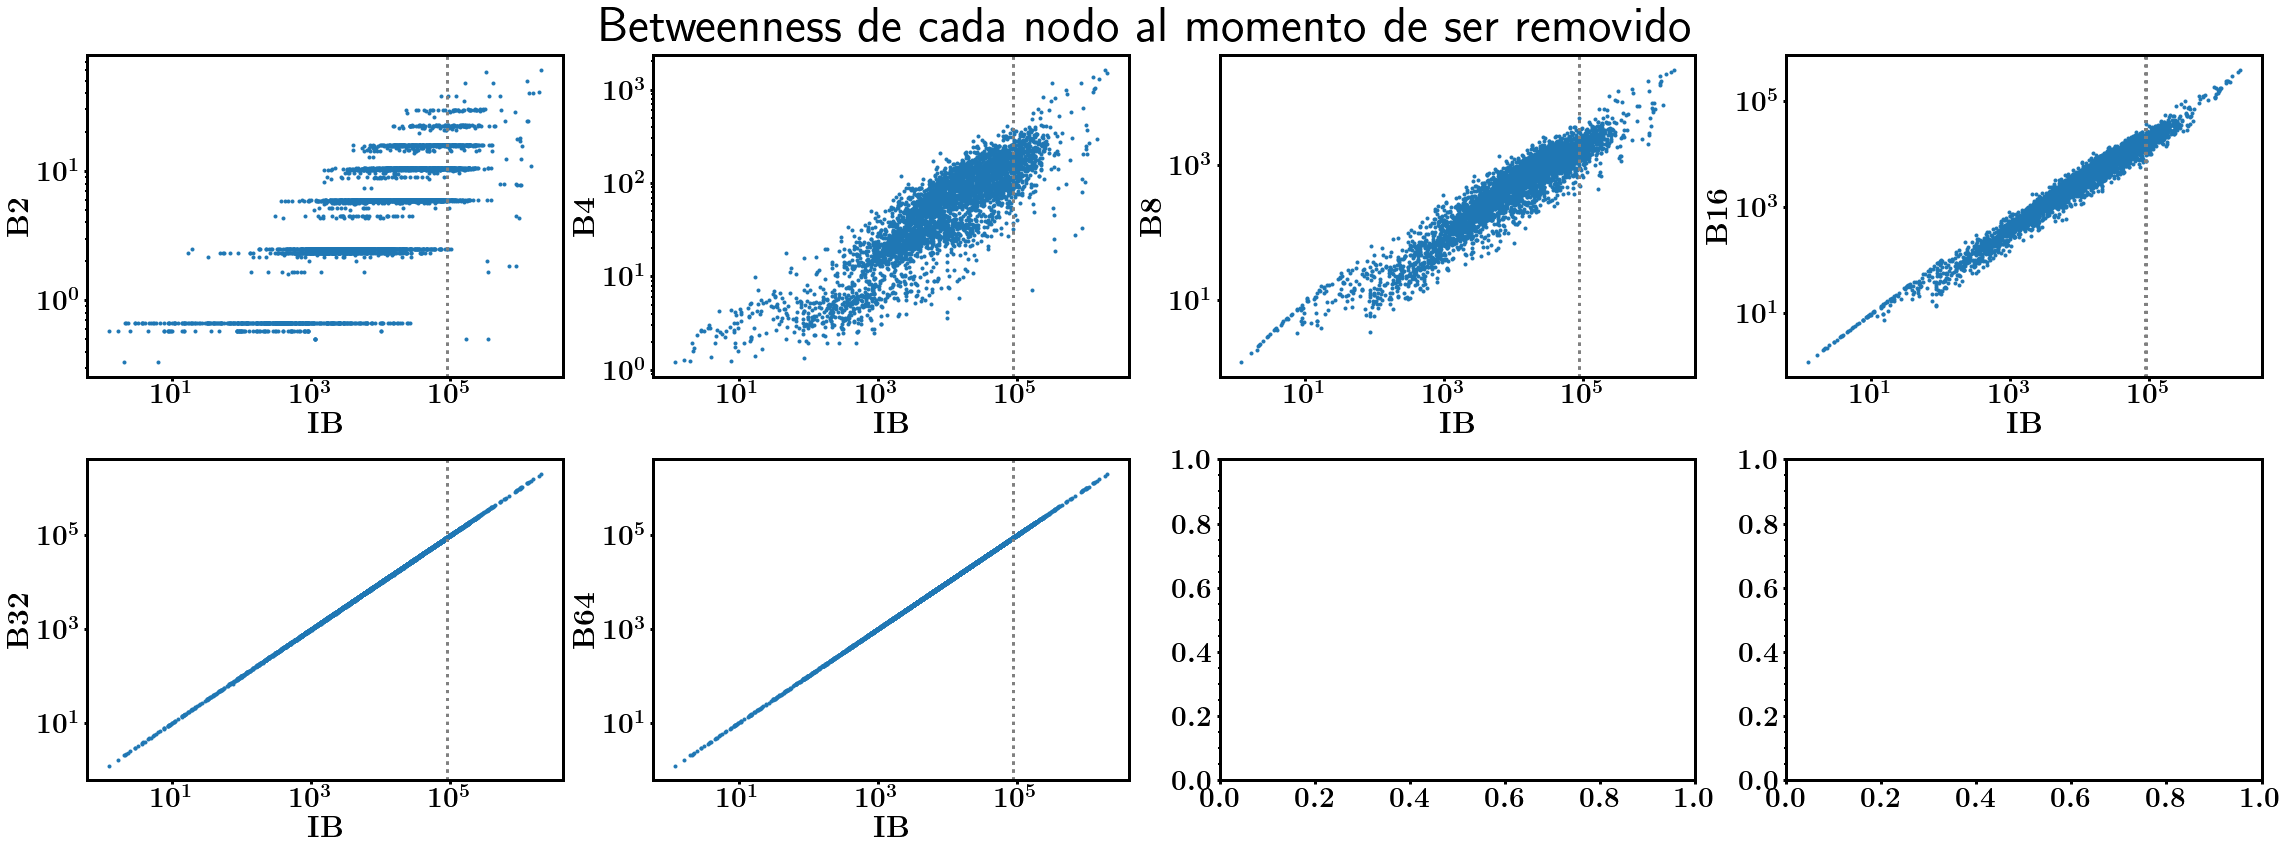

In [539]:
btw_by_node_id = dict(zip(o_df[base_attack].values, c_df[base_attack].values))
X = [btw_by_node_id[idx] for idx in range(size)]

ncols = 4
nrows = 2
fig, axes = plt.subplots(figsize=(8*ncols,6*nrows), ncols=ncols, nrows=nrows)
axes = axes.flatten()
fig.suptitle('Betweenness de cada nodo al momento de ser removido', fontsize=50)
_l_values = sorted(set([2, 4, 8, 16, 32, 48, 58, 64]).intersection(l_values))
for i, l in enumerate(_l_values):
    
    btw_l_by_node_id = dict(zip(o_df[l].values, c_df[l].values))
    Y = [btw_l_by_node_id[idx] for idx in range(size)]
    ax = axes[i]
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(attack_dict[base_attack])
    ax.set_ylabel(attack_dict[f'{base_attack}_cutoff{l}'])
    ax.plot(X, Y, '.')
    #ax.plot(identity, identity, '--k')
    ax.axvline(vline, linestyle=':', color='gray')
    ax.axvline(vline_m_std, linestyle=':', color='gray')
    ax.axvline(vline_p_std, linestyle=':', color='gray')

plt.tight_layout()

plt.savefig(f'../draft/figs/btw_al_ser_removido_{base_attack}.png', transparent=False)
plt.show()


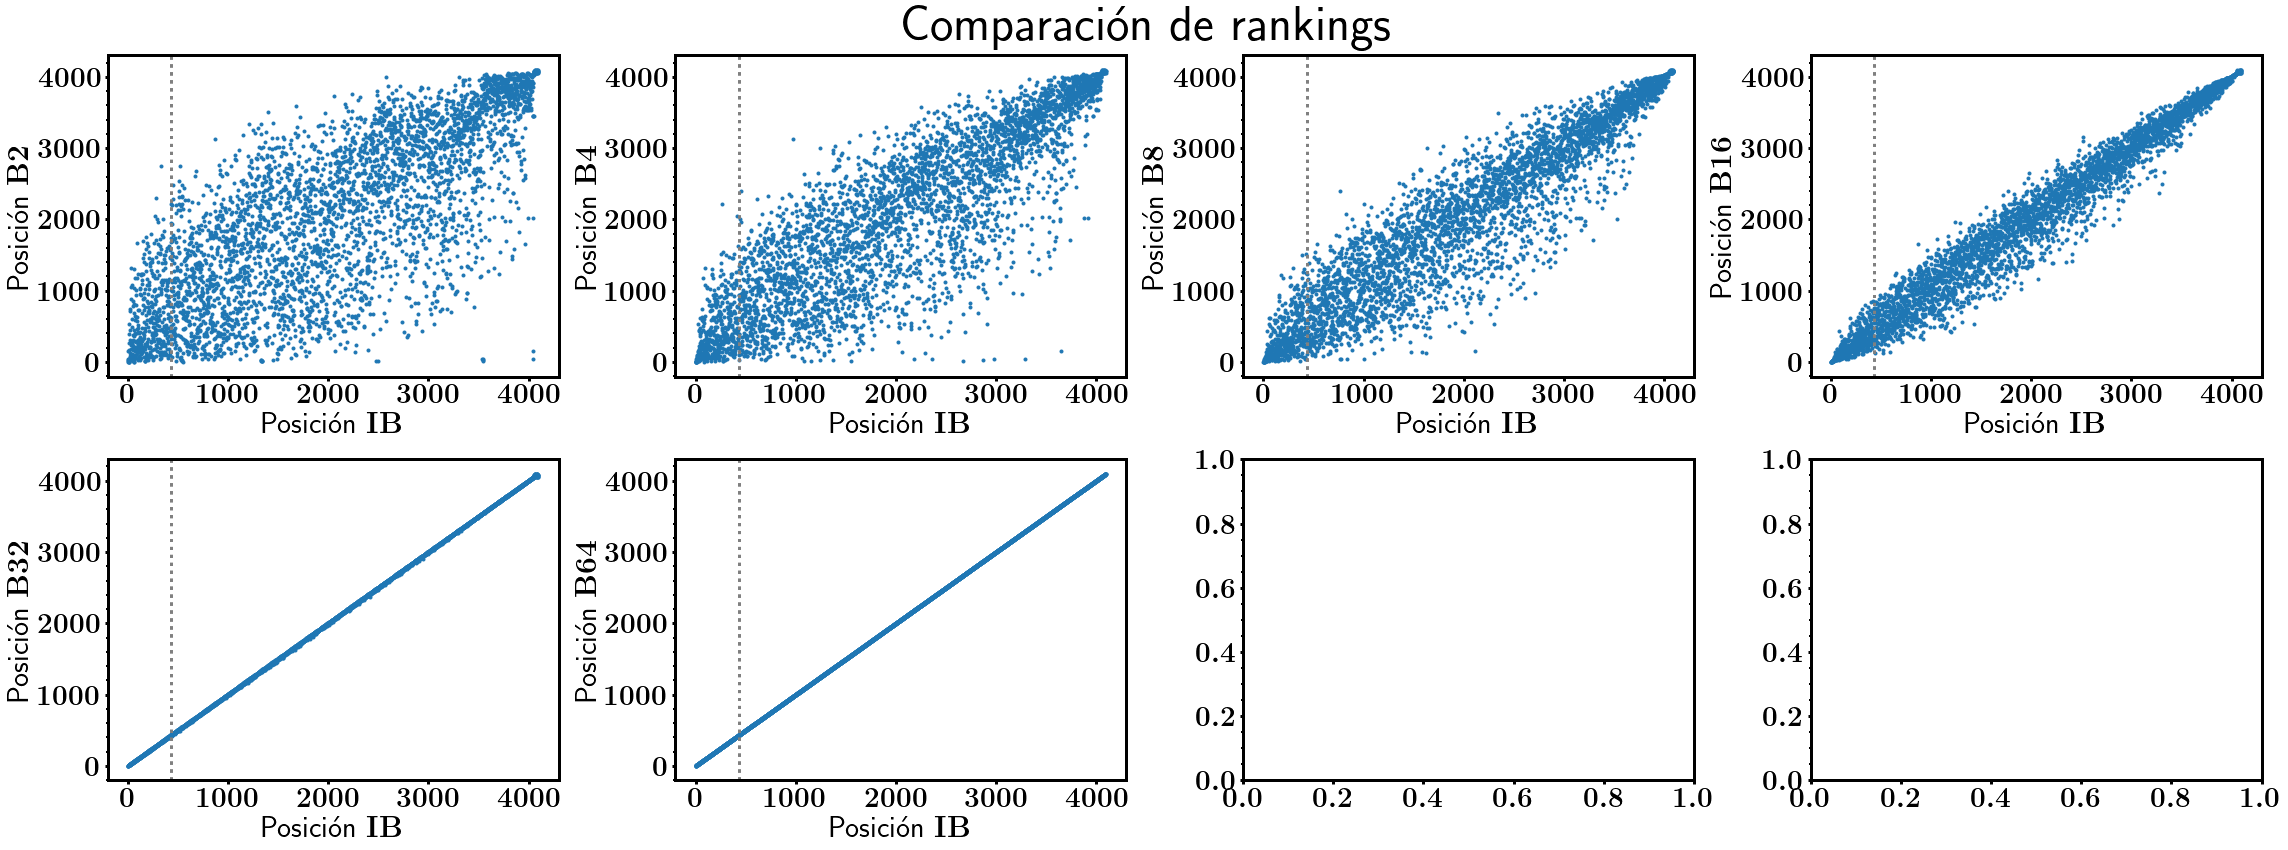

In [542]:
rank_by_base_attack = o_df.reset_index().set_index(base_attack)['index'].to_dict()
X = range(size)

ncols = 4
nrows = 2
fig, axes = plt.subplots(figsize=(8*ncols,6*nrows), ncols=ncols, nrows=nrows)
axes = axes.flatten()
fig.suptitle('Comparación de rankings', fontsize=50)
_l_values = sorted(set([2, 4, 8, 16, 32, 48, 58, 64]).intersection(l_values))
for i, l in enumerate(_l_values):
    
    Y = [rank_by_base_attack[value] for value in o_df[l].values]
    ax = axes[i]
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.set_xlabel('Posición ' + attack_dict[base_attack])
    ax.set_ylabel('Posición ' + attack_dict[f'{base_attack}_cutoff{l}'])
    ax.plot(X, Y, '.')
    #ax.plot(identity, identity, '--k')
    ax.axvline(vline, linestyle=':', color='gray')
    ax.axvline(vline_m_std, linestyle=':', color='gray')
    ax.axvline(vline_p_std, linestyle=':', color='gray')

plt.tight_layout()

plt.savefig(f'../draft/figs/rank_vs_rank_{base_attack}.png', transparent=False)
plt.show()


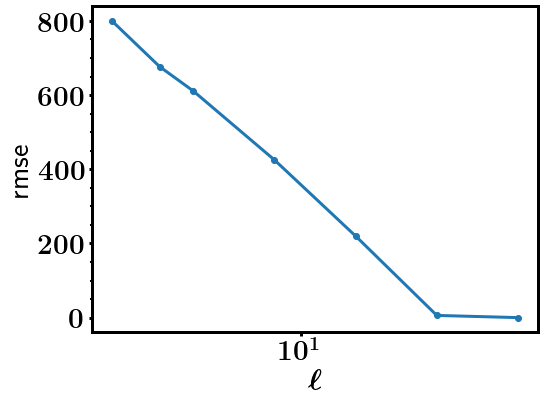

In [543]:
rmse_values = []
for l in l_values:
    rmse = 0
    for seed in seeds:
        mapping = o_dfs[seed][[base_attack]].reset_index().set_index(base_attack)['index']
        data = o_dfs[seed][l].map(mapping)
        rmse += np.sqrt(pd.Series(((data.values-data.index)**2)).sum() / data.shape[0])   
    rmse_values.append(rmse/nseeds)

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel(r'$\ell$')
ax.set_ylabel('rmse')
ax.set_xscale('log')
ax.plot(l_values, rmse_values, '-o')

plt.savefig(f'../draft/figs/rmse_{base_attack}.png', transparent=False)
plt.show()

In [544]:
def normalised_kendall_tau_distance(values1, values2):
    """Compute the Kendall tau distance."""
    if hasattr(values1, 'values'):
        values1 = values1.values
    if hasattr(values2, 'values'):
        values2 = values2.values
    n = len(values1)
    assert len(values2) == n, "Both lists have to be of equal length"
    i, j = np.meshgrid(np.arange(n), np.arange(n))
    a = np.argsort(values1)
    b = np.argsort(values2)
    ndisordered = np.logical_or(np.logical_and(a[i] < a[j], b[i] > b[j]), np.logical_and(a[i] > a[j], b[i] < b[j])).sum()
    return ndisordered / (n * (n - 1))

In [545]:
normalised_kendall_tau_distance([1, 2, 3, 4, 5], [3, 4, 1, 2, 5])

0.4

In [546]:
from scipy.stats import kendalltau, spearmanr
from collections import defaultdict

In [547]:
df = o_df

data = defaultdict(list)
values1 = df[base_attack]
for l in l_values:
    print(l)
    values2 = df[l]
    tau_distance = normalised_kendall_tau_distance(values1, values2)
    tau = kendalltau(values1, values2).correlation
    rho = spearmanr(values1, values2).correlation
    data['taudistance'].append(tau_distance)
    data['tau'].append(tau)
    data['rho'].append(rho)

2
3
4
8
16
32
64


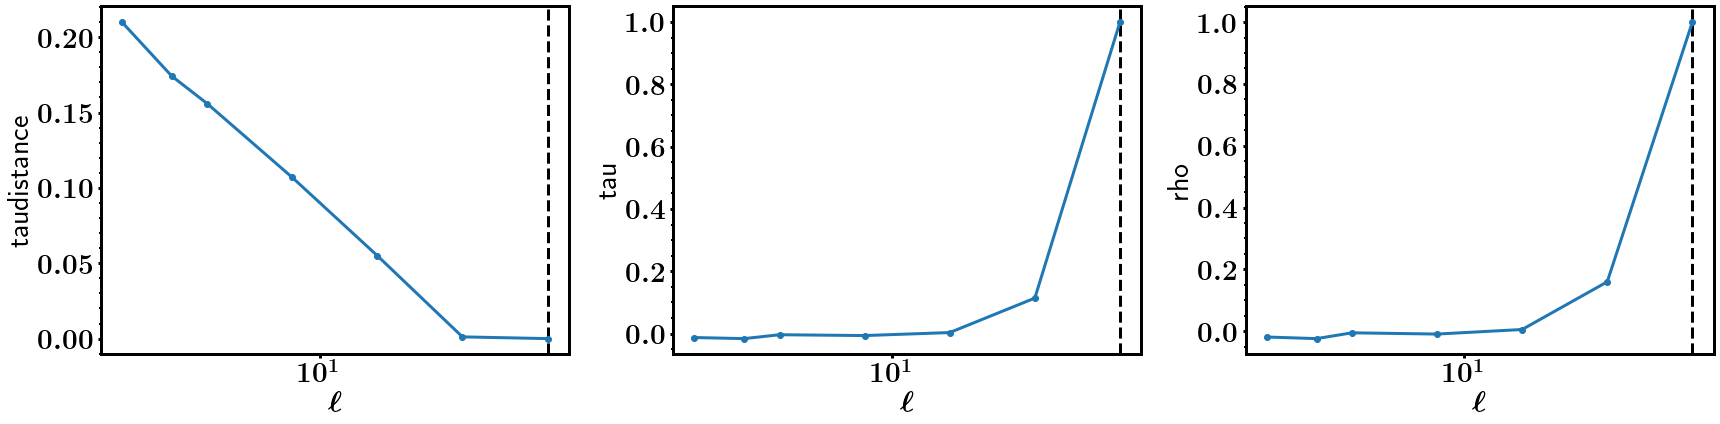

In [548]:
ncols = len(data.keys())
fig, axes = plt.subplots(figsize=(8*ncols,6), ncols=ncols)

for i, (metric, values) in enumerate(data.items()):
    ax = axes[i]
    ax.set_xscale('log')
    ax.set_xlabel(r'$\ell$')
    ax.set_ylabel(metric)
    ax.axvline(64, color='k', linestyle='--')
    ax.plot(l_values, values, 'o-')
plt.tight_layout()
plt.savefig(f'../draft/figs/rank_diff_and_corr_{base_attack}.png', transparent=False)
plt.show()

In [11]:
net_type = 'DT'
param = 'param'
size = 4096
base_attack = 'Btw'
l_values = list(range(100))
seeds = range(1)
nseeds = len(seeds)

base_df =  load_dataframe(net_type, size, param, base_attack, min_nseeds=1000)

attack_dfs = {}

for l in list(l_values):
    attack = f'{base_attack}_cutoff{l}'
    try:
        df = load_dataframe(net_type, size, param, attack, min_nseeds=1000)
    except FileNotFoundError:
        continue
    attack_dfs[l] = df
    
l_values = list(attack_dfs.keys())

In [12]:
[(l, df.attrs['nseeds']) for l, df in attack_dfs.items()]

[(2, 10000),
 (3, 10000),
 (4, 10000),
 (5, 1000),
 (6, 1000),
 (7, 1000),
 (8, 10000),
 (9, 1000),
 (10, 1000),
 (11, 1000),
 (12, 1000),
 (13, 1000),
 (14, 1000),
 (15, 1000),
 (16, 10000),
 (17, 1000),
 (18, 1000),
 (19, 1000),
 (20, 1000),
 (21, 1000),
 (22, 1000),
 (23, 1000),
 (24, 1000),
 (25, 1000),
 (26, 1000),
 (27, 1000),
 (28, 1000),
 (29, 1000),
 (30, 1000),
 (31, 10000),
 (32, 1000)]

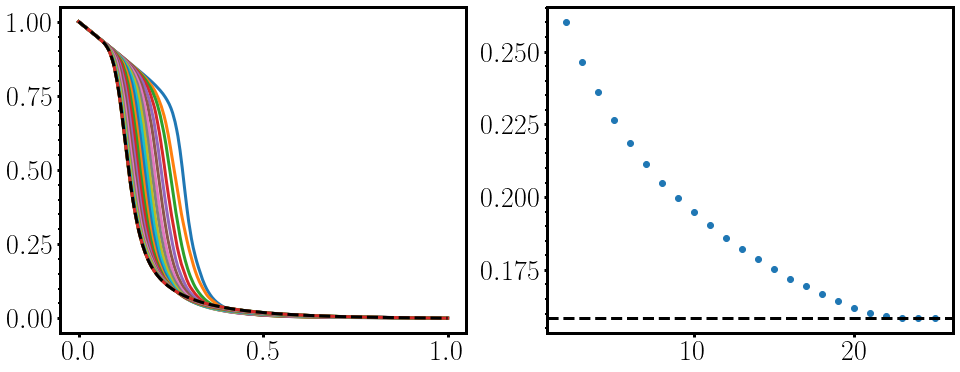

In [56]:
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes[0]
ax.plot(base_df.f, base_df.Sgcc, color='k', linestyle='--', zorder=100)
for l, df in attack_dfs.items():
    ax.plot(df.f, df.Sgcc)
    
ax = axes[1]
dx = 1/size
base_area = simps(base_df.Sgcc, dx=dx)
#areas = np.zeros((len(attack_dfs), 2))
areas = []
for l, df in attack_dfs.items():
    area = simps(df.Sgcc, dx=dx)
    areas.append(area)
areas = np.array(areas)    
ax.plot(l_values, areas, 'o')
ax.axhline(base_area, color='k', linestyle='--')

#plt.tight_layout()
plt.show()

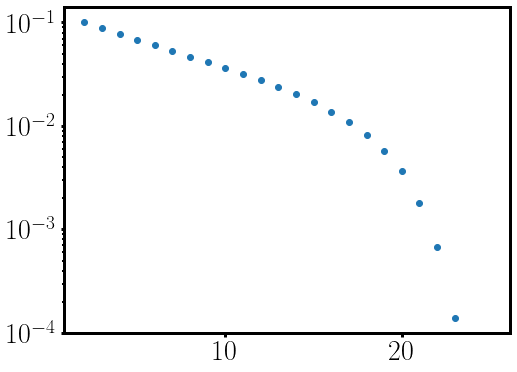

In [58]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)
ax.plot(l_values, areas-base_area, 'o')
ax.set_yscale('log')
#ax.set_xscale('log')

512 10000 11 12 0.004973983732921991 -0.00012339723274451162 10000 10000
1024 10000 16 17 0.0034638093221704513 -5.748555753450944e-05 10000 10000
2048 10000 23 24 0.0008759891719720371 -7.136265624985334e-06 10000 10000
4096 33
8192 10000 44 47 0.00032328214436680165 -0.0035831642534790787 1000 1000
16384 10000 59 60 0.00023961561818313894 -0.0002548432851656751 1000 1000


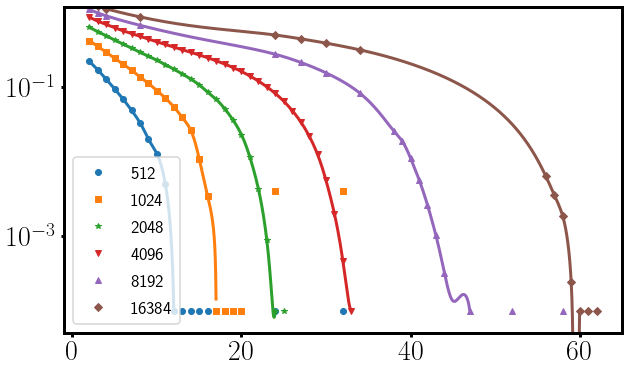

In [71]:
net_type = 'DT'
param = 'param'
sizes = [512, 1024, 2048, 4096, 8192, 16384]
base_attack = 'Btw'
l_values = list(range(100))
seeds = range(1)
nseeds = len(seeds)

def get_attack_dfs(net_type, size, param, base_attack, l_values, min_nseeds=1000):
    base_df =  load_dataframe(net_type, size, param, base_attack, min_nseeds=min_nseeds)
    attack_dfs = {}
    for l in list(l_values):
        attack = f'{base_attack}_cutoff{l}'
        try:
            df = load_dataframe(net_type, size, param, attack, min_nseeds=min_nseeds)
        except FileNotFoundError:
            continue
        attack_dfs[l] = df
    return base_df, attack_dfs

def get_areas(base_df, attack_dfs, size):
    dx = 1/size
    base_area = simps(base_df.Sgcc, dx=dx)
    areas = []
    for l, df in attack_dfs.items():
        area = simps(df.Sgcc, dx=dx)
        areas.append(area)
    areas = np.array(areas)    
    return base_area, areas

l_cutoffs = []

ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

markers = ['o', 's', '*', 'v', '^', 'D', 'h', 'x', '+', '8', 'p', '<', '>', 'd', 'H']
for i, size in enumerate([512, 1024, 2048, 4096, 8192, 16384]):
    base_df, attack_dfs = get_attack_dfs(net_type, size, param, base_attack, l_values, min_nseeds=500)
    base_area, areas = get_areas(base_df, attack_dfs, size)
    _l_values = np.array(list(attack_dfs.keys()))
    th = 1e-4
    relative_diff = (areas-base_area)/base_area
    ltzero = relative_diff<0
    try:
        first = np.where(ltzero)[0][0]
        print(
            size, base_df.attrs['nseeds'], 
            _l_values[first-1], _l_values[first], 
            relative_diff[first-1], relative_diff[first], 
            attack_dfs[_l_values[first]].attrs['nseeds'],
            attack_dfs[_l_values[first+1]].attrs['nseeds']
        )
    except IndexError:
        print(size, _l_values[-1])
    relative_diff[ltzero] = th
    #ax.plot(_l_values*size**(-0.5), relative_diff, markers[i], label=size)
    ax.plot(_l_values, relative_diff, markers[i], label=size)
    
    ltth = _l_values[relative_diff<=th]
    max_l = np.min(ltth) if ltth.size>0 else _l_values[-1]
    X = np.arange(_l_values[0], max_l, 0.01)
    m = list(_l_values).index(max_l)+1
    Y = interp1d(_l_values[:m], relative_diff[:m], kind='cubic')
    ax.plot(X, Y(X), '-', color=f'C{i}')
    
    th2 = 1e-1
    pos = np.where(Y(X)<th2)[0][0]
    l_cutoff = X[pos]
    l_cutoffs.append(l_cutoff)
    
ax.set_yscale('log')
ax.set_ylim(5e-5, 1.2)
ax.legend(fontsize=18)
plt.show()

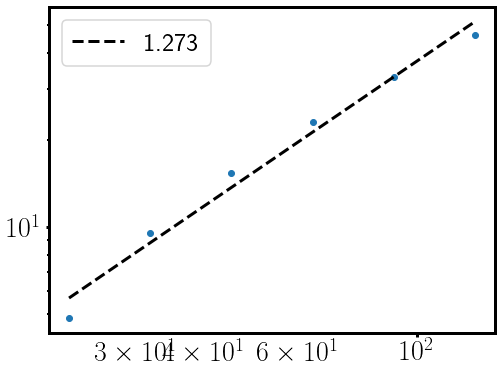

In [72]:
fig, ax = plt.subplots(figsize=(8,6))

X = np.sqrt(sizes)

ax.plot(X, l_cutoffs, 'o')
ax.set_xscale('log')
ax.set_yscale('log')

Y_pred, slope, y_err = getLinearReg(X, l_cutoffs)
ax.plot(X, Y_pred, '--', color='k', label='{:.3f}'.format(slope))
ax.legend()

(0.4, 0.8)

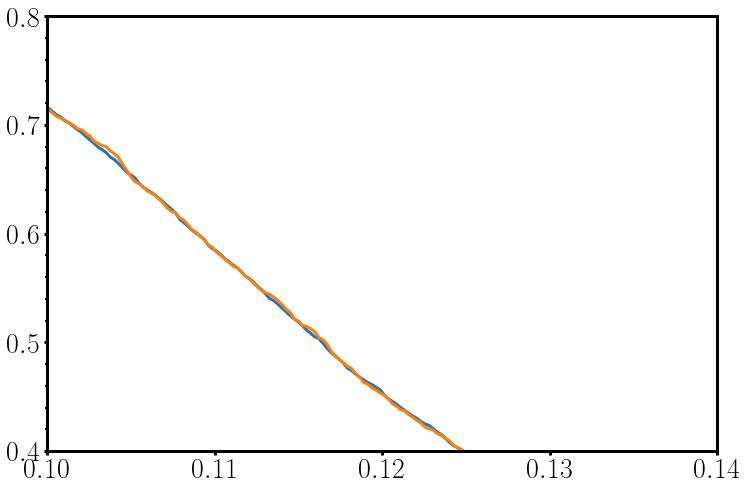

In [26]:
size, l = 4096, 32
#size, l = 8192, 44
base_df, attack_dfs = get_attack_dfs(net_type, size, param, base_attack, l_values, min_nseeds=500)

plt.plot(attack_dfs[l].f, attack_dfs[l].Sgcc)
plt.plot(attack_dfs[l+1].f, attack_dfs[l+1].Sgcc)
plt.xlim(0.1, 0.14)
plt.ylim(0.4, 0.8)